In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Mall_Customers.csv")
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
data.info() #No null entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<AxesSubplot:>

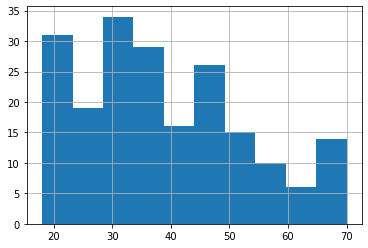

In [4]:
data['Age'].hist()

In [5]:
data['Genre'].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

c:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

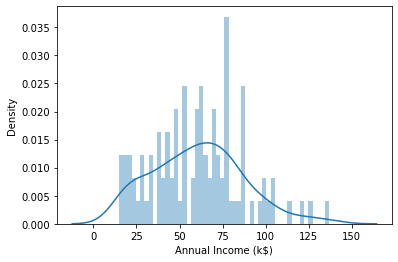

In [6]:
sns.distplot(data['Annual Income (k$)'],kde = True,bins=50)

c:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

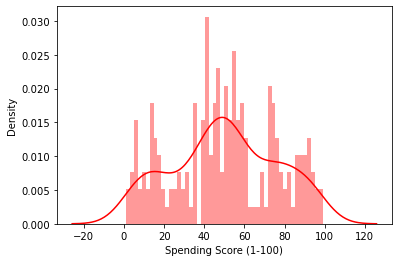

In [7]:
sns.distplot(data['Spending Score (1-100)'],kde = True,bins=50,color='red')

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

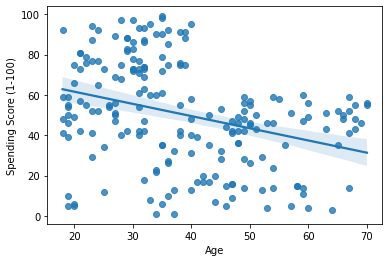

In [8]:
sns.regplot(x='Age',y='Spending Score (1-100)',data=data)

In [21]:
data = data[['Annual Income (k$)','Spending Score (1-100)']]
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [10]:
from sklearn.cluster import KMeans

km_model = KMeans(n_clusters=5)
km_model.fit(data)

KMeans(n_clusters=5)

In [11]:
print(km_model.cluster_centers_)

[[25.72727273 79.36363636]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [88.2        17.11428571]
 [55.2962963  49.51851852]]


In [12]:
print(km_model.feature_names_in_)

['Annual Income (k$)' 'Spending Score (1-100)']


In [13]:
print(km_model.labels_)

[2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 4 2 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 1 3 1 4 1 3 1 3 1 4 1 3 1 3 1 3 1 3 1 4 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


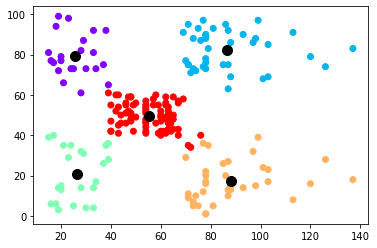

In [14]:
plt.scatter(data.values[:,0],data.values[:,1],c = km_model.labels_,cmap='rainbow')

plt.scatter(km_model.cluster_centers_[:,0],km_model.cluster_centers_[:,1],s=100,c='black')

In [19]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = data.index.values
cluster_map['cluster'] = km_model.labels_
cluster_map

,data_index,cluster
0,0,2
1,1,0
2,2,2
3,3,0
4,4,2
...,...,...
195,195,1
196,196,3
197,197,1
198,198,3


In [23]:
loss = []
for i in range(1,11):
    km_model = KMeans(n_clusters = i,init ='k-means++', random_state=42)
    km_model.fit(data)
    loss.append(km_model.inertia_)
    

plt.plot(range(1,11), loss)
plt.title('Finding the optimal Value of clusters- The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Loss')
plt.show()

AttributeError: 'NoneType' object has no attribute 'split'